In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv("diabetes.csv")
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
x=dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y=dataset['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
dataset['Outcome'].unique()

array([1, 0], dtype=int64)

In [11]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.2,random_state=0)

In [13]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [14]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.8246753246753247
[[98  9]
 [18 29]]


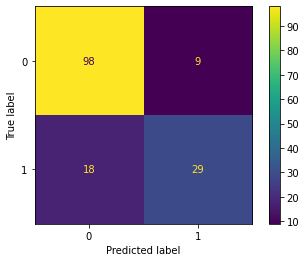

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
cmd.plot()

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.7142857142857143
[[97 10]
 [34 13]]


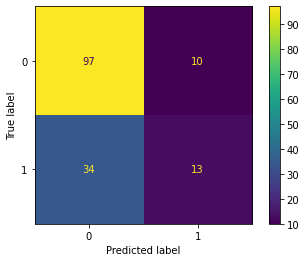

In [19]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
cmd.plot()

In [20]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.7922077922077922
[[93 14]
 [18 29]]


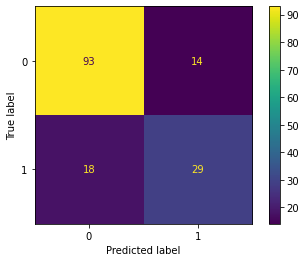

In [22]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm, display_labels=nb.classes_)
cmd.plot()

In [23]:
from sklearn.svm import SVC

svm=SVC(gamma='auto')

svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.6948051948051948
[[107   0]
 [ 47   0]]


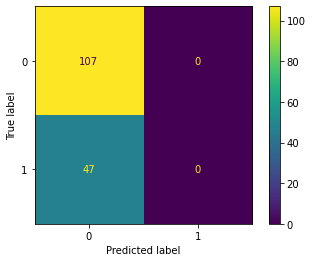

In [25]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm, display_labels=svm.classes_)
cmd.plot()

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)


In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.7792207792207793
[[86 21]
 [13 34]]


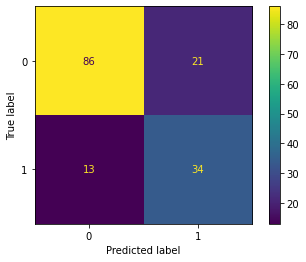

In [28]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm, display_labels=dtree.classes_)
cmd.plot()

In [29]:

import pickle 

pickle.dump(lr,open('diabetes1.pkl','wb'))